## Project: Machine Learning for Shipment Mode Optimization in Global Supply Chains

# Table of Contents

- [1. Introduction](#1.-Introduction)
   - [1.1 Background](#1.1-Background)
   - [1.2 Objective](#1.2-Objective)
      - [1.2.1 Problem Statement](#1.2.1-Problem-Statement)
- [2. Data Overview](#2.-Data-Overview)
  - [2.1 Data Importing](#2.1-Data-Importing)
  - [2.2 Data Dictionary](#2.2-Data-Dictionary)
- [3. Data Cleaning & Preparation](#3.-Data-Cleaning-&-Preparation)
    - [3.1 Handling Missing Data](#3.1-Handling-Missing-Data)
    - [3.2 Handling High Cardinality Variables](#3.2-Handling-High-Cardinality-Variables)
- [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
  - [4.1 Numerical Features](#4.1-Numerical-Features)
  - [4.2 Categorical Features: Univariate & Bivariate Analysis](#4.2-Categorical-Features:-Univariate-&-Bivariate-Analysis)
- [5. Feature Engineering](#5.-Feature-Engineering)
    - [5.1 Extract Date Features](#5.1-Extract-Date-Features)
    - [5.2 Binary Encoding](#5.2-Binary-Encoding)
    - [5.3 One Hot Encoding](#5.3-One-Hot-Encoding)
    - [5.4 Splitting the Dataset & Encoding Labels](#5.4-Splitting-the-Dataset-&-Encoding-Labels)
    - [5.5 Standard Scailing](#5.5-Standard-Scailing)
    - [5.6 Label Mapping](#5.6-Label-Mapping)
- [6. Model Testing & Prediction](#6.-Model-Testing-&-Prediction)
    - [6.1 Baseline Model: Multinomial Logistic Regression](#6.1-Baseline-Model:-Multinomial-Logistic-Regression)
    - [6.2 Gradient Boosting Classifier](#6.2-Gradient-Boosting-Classifier)
    - [6.3 Neural Network (MLP) Classifier](#6.3-Neural-Network-(MLP)-Classifier)
    - [6.4 Random Forest Classifier](#6.4-Random-Forest-Classifier)
- [7. Performance Evaluation](#7.-Performance-Evaluation)
   - [7.1 Baseline Model: Multinomial-Logistic Regression](#7.1-Baseline-Model:-Multinomial-Logistic-Regression)
   - [7.2 Gradient Boosting Classifier](#7.2-Gradient-Boosting-Classifier)
   - [7.3 Neural Network (MLP) Classifier](#7.3-Neural-Network-(MLP)-Classifier)
   - [7.4 Random Forest Classifier](#7.4-Random-Forest-Classifier)
   - [7.5 HyperParameter Tuning](#7.5-HyperParameter-Tuning)
- [8. Data Visualisation](#8.-Data-Visualisation)
   - [8.1 Comparison of Models](#8.1-Comparison-of-Models)
   - [8.2 Visualising One Decision Tree](#8.2-Visualising-One-Decision-Tree)
   - [8.3 Top 10 Features](#8.3-Top-10-Features)
   - [8.4 Actual vs Predicted](#8.4-Actual-vs-Predicted)
   - [8.5 OOB Error](#8.5-OOB-Error)
- [9. Limitations & Conclusions](#9.-Limitations-&-Conclusions)
- [10. Citations & References](#10.-Citations-&-References)
- [11. Appendix](#11.-Appendix)
  - [11.1 Project Management (Trello)](#11.1-Project-Management-(Trello))
  - [11.2 GenAI Component](##11.2-GenAI-Component)
  - [11.3 Additional Workings](#11.3-Additional-Workings)

# 1. Introduction 

## 1.1 Background

The supply chain is a global system connecting procurement, manufacturing, shipping, and delivery of essential goods, including HIV health commodities, to recipient countries. Logistics are essential for the efficient and timely delivery of life-saving medications, such as Antiretroviral (ARV) drugs. This operation's international scope presents challenges such as managing transportation costs, timeliness, and service quality, all of which must be optimized to enhance healthcare in resource-limited settings. 

This analysis employs data from the  **United States Agency for International Development (USAID)**:- [Supply Chain Shipment Pricing Data](https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Dataset/a3rc-nmf6/about_data). The dataset includes information on shipment costs, delivery methods (Air, Truck, Air Charter, Ocean), schedules, and product details for ARVs and other HIV-related supplies. These shipments are essential for healthcare systems in areas with infrastructure limitations that necessitate timely deliveries.

## 1.2 Objective
### 1.2.1 Problem Statement

The primary objective is to create a predictive model for identifying the best shipment mode according to logistical factors. This **multiclass classification** problem entails predicting one of four shipment modes: Air, Truck, Air Charter, or Ocean, based on features including product type, shipment size, cost, and delivery deadlines. The choice is highly context-dependent due to variations in cost, speed, reliability, and capacity among each mode. Air freight is suitable for urgent or high-value items, whereas ocean freight is cost-effective for bulk shipments with flexible timelines. 

Accurate predictions will allow organizations such as USAID to make informed decisions, enhancing logistical efficiency, lowering costs, and ensuring timely delivery of health commodities. This analysis will optimize supply chain management, especially in healthcare, where effective delivery systems are crucial for saving lives and improving global health initiatives. The insights seek to improve decision-making and resource allocatioes.

## 2. Data Overview

### 2.1 Data Importing

In [1]:
# Importing the necessary libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest

In [3]:
# Set pandas to display all columns
# Configures pandas to display all columns in the DataFrame, regardless of the number.
pd.set_option('display.max_columns', None)

In [5]:
file_path = 'Supply_Chain_Shipment_Pricing_Dataset.csv'
data = pd.read_csv(file_path)

### 2.2 Data Dictionary

The dataset was imported with Pandas to manage structured data for analysis efficiently. A Data Dictionary was developed to detail each column’s data type, description, and counts of missing and unique values, facilitating data understanding and preprocessing.

In [7]:
# Get column names of the dataset
columns = data.columns.tolist()

# Ensure the number of descriptions matches the number of columns
description_list = [
    'unique identifier for shipment', 
    'project code', 
    'price quote (PQ) number', 
    'Purchase order/ Sales order',
    'Advanced shipping notice / Delivery note number',
    'destination country', 
    'SCMS managing office', 
    'method through which the shipment was fulfilled', 
    'vendor inco term (also known as International Commercial Terms)', 
    'method by which commodities are shipped', 
    'date the PQ is first sent to the client', 
    'date the PO is first sent to the vendor', 
    'current anticipated delivery date', 
    'date of delivery to client', 
    'date on which delivery to client was recorded in SCMS information systems', 
    'product group for item, i.e. ARV, HRDT', 
    'Identifies relevant product sub classifications. Eg: ARVs are pediatric or adult', 
    'vendor name', 
    'product name and details from PFSCM inventory list', 
    'active drug(s) or test kit type', 
    'generic or branded name for the item', 
    'item dosage and unit', 
    'dosage form for the item (tablet, oral solution, injection, etc.)', 
    'pack quantity (pills or test kits) used to compute unit price', 
    'total quantity (packs) of commodity per line item', 
    'total value of commodity per line item', 
    'Cost per pack (i.e. month s supply of ARVs, pack of 60 test kits)', 
    'cost per pill (for drugs) or per test (for test kits)', 
    'identifies manufacturing site for the line item for direct drop and from RDC deliveries',
    'First line Designation',
    'weight for all lines on an ASN DN',
    'freight charges associated with all lines on the respective ASN DN',
    'Line item cost of insurance, created by applying an annual flat rate to commodity cost'
]

# Ensure descriptions list has the same length as the columns list
if len(description_list) != len(columns):
    raise ValueError(f"Descriptions list length does not match columns list length. Got {len(description_list)} descriptions, but {len(columns)} columns.")

# Now calculate the missing and unique values
missing_values = [data[col].isna().sum() for col in columns]
unique_values = [data[col].nunique() for col in columns]

# Create the data dictionary DataFrame
data_dict = pd.DataFrame({
    'Feature': columns,
    'Data Type': data.dtypes,
    'Description': description_list,
    'Missing Values': missing_values,
    'Unique Values': unique_values
})

# View the data dictionary
data_dict

,Feature,Data Type,Description,Missing Values,Unique Values
id,id,int64,unique identifier for shipment,0,10324
project code,project code,object,project code,0,142
pq #,pq #,object,price quote (PQ) number,0,1237
po / so #,po / so #,object,Purchase order/ Sales order,0,6233
asn/dn #,asn/dn #,object,Advanced shipping notice / Delivery note number,0,7030
country,country,object,destination country,0,43
managed by,managed by,object,SCMS managing office,0,4
fulfill via,fulfill via,object,method through which the shipment was fulfilled,0,2
vendor inco term,vendor inco term,object,vendor inco term (also known as International ...,0,8
shipment mode,shipment mode,object,method by which commodities are shipped,360,4


## 3. Data Cleaning & Preparation

### 3.1 Handling Missing Data

In [9]:
# Function for handling missing data
def handle_missing_values(df):
    
    """Handles missing values in the dataframe by filling and dropping missing data as appropriate."""
    
    # Drop 'id' column
    df = df.drop('id', axis=1)

    # Drop missing target rows (rows where 'shipment mode' is missing)
    missing_target_rows = df[df['shipment mode'].isna()].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

    # Fill missing values in 'dosage' with the mode of the column
    df['dosage'] = df['dosage'].fillna(df['dosage'].mode()[0])

    # Fill missing values in 'line item insurance (usd)' with the mean of the column
    df['line item insurance (usd)'] = df['line item insurance (usd)'].fillna(df['line item insurance (usd)'].mean())

    # Drop date columns with too many missing values
    df = df.drop(['pq first sent to client date', 'po sent to vendor date'], axis=1)

    # Drop numeric columns with too many missing values
    df = df.drop(['weight (kilograms)', 'freight cost (usd)'], axis=1)

    return df

Missing data was managed to ensure unbiased and reliable modelling. Rows lacking essential target values (e.g., shipment mode) were excluded, and missing data in numerical and categorical columns were imputed using statistical techniques (mean for numerical and mode for categorical data). Columns with high missing values were eliminated to prevent interference.

### 3.2 Handling High Cardinality Variables

In [11]:
def handle_high_cardinality_variables(df):
    
    """Handles high cardinality categorical variables by dropping columns with excessive unique values."""
    
    # Drop high cardinality categorical columns (e.g., those with too many unique values)
    df = df.drop(['pq #', 'po / so #', 'asn/dn #'], axis=1)

    return df

High-cardinality columns such as "PO #" and "ASN/DN #" were removed due to their limited generalizability and potential to impair model interpretability or contribute to overfitting.

### 3.3 Handling Outliers

In [13]:
from sklearn.ensemble import IsolationForest

def handle_outliers(data):
    # Automatically identify numeric columns
    numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate the IQR for each numeric feature
    Q1 = data[numeric_features].quantile(0.25)
    Q3 = data[numeric_features].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier condition: Any value outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
    outliers_condition = ((data[numeric_features] < (Q1 - 1.5 * IQR)) | 
                          (data[numeric_features] > (Q3 + 1.5 * IQR)))

    # Find rows with outliers based on IQR
    outliers_rows_iqr = data[numeric_features][outliers_condition.any(axis=1)]

    # Print the rows with outliers based on IQR
    print("Outliers Detected via IQR-based Method:")
    print(outliers_rows_iqr)

    # Cap outliers to the nearest boundary (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
    data_capped = data.copy()

    # Cap the outliers for all numeric columns
    for column in numeric_features:
        lower_limit = Q1[column] - 1.5 * IQR[column]
        upper_limit = Q3[column] + 1.5 * IQR[column]
        data_capped[column] = data[column].clip(lower=lower_limit, upper=upper_limit)

    # Isolation Forest Outlier Detection
    iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination rate as needed
    outliers = iso_forest.fit_predict(data[numeric_features])

    # Convert the output into a boolean array (1 = normal, -1 = outlier)
    outliers = outliers == -1

    # Print outliers detected by Isolation Forest
    print("\nOutliers Detected via Isolation Forest:")
    outlier_rows = data[numeric_features][outliers]
    print(outlier_rows)

    # Plot the outliers using a scatter plot for each numeric feature
    plt.figure(figsize=(15, 8))
    
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(2, len(numeric_features)//2 + 1, i)
        sns.scatterplot(x=data.index, y=data[feature], hue=outliers, palette={True: 'red', False: 'blue'}, s=60)
        plt.title(f'Outliers Detected for {feature}', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Return the capped data and outlier information
    return data_capped, outliers_rows_iqr, outlier_rows

Outliers were identified using the IQR method, flagging values beyond 1.5 × IQR from Q1 or Q3. Among the 4,133 detected outliers, capping at IQR boundaries maintained data integrity and minimized their influence on the model. 

Another 499 significant outliers were identified through the Isolation Forest, revealing anomalies in line-item quantity and unit price, which underscore distinct shipment patterns. Scatter plots indicated clear clusters, with large shipments preferring ocean transport and high-value items associated with premium air modes. Flagged outliers were retained to inform feature importance while minimizing disproportionate influence.
.



Outliers Detected via IQR-based Method:
      unit of measure (per pack)  line item quantity  line item value  \
1                            240                1000          6200.00   
2                            100                 500         40000.00   
5                            240                 416          2225.60   
11                            20                2500        100000.00   
12                           100                  10           850.00   
...                          ...                 ...              ...   
9947                          60               46752        168307.20   
9955                         120               70000       1304800.00   
9958                          60              205243        738874.80   
9959                          60              166571        599655.60   
9961                          30              514526       5140114.74   

      pack price  unit price  line item insurance (usd)  
1           6.20        0

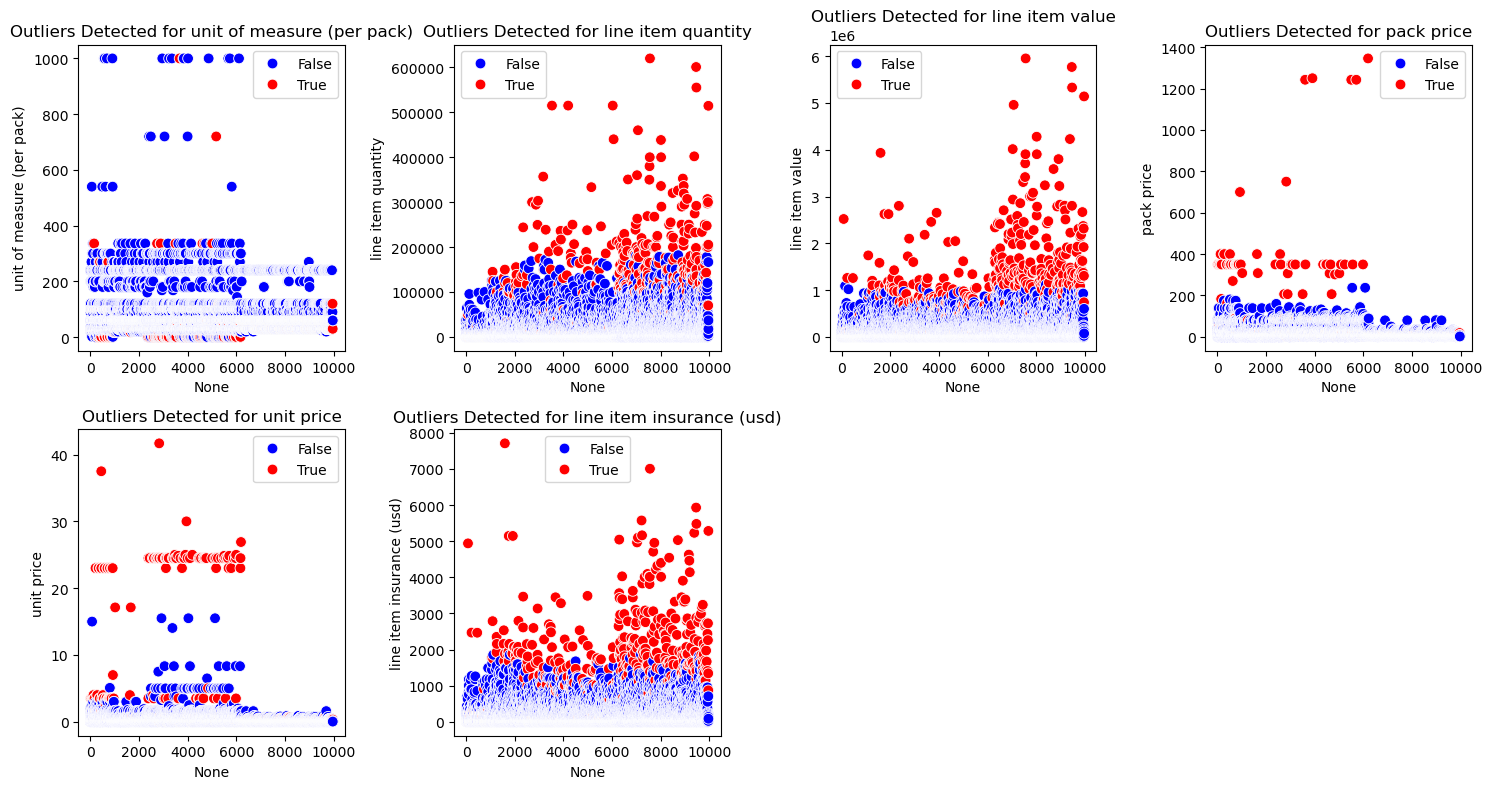

In [16]:
# Step 1: Handle missing values (data_1 will be the cleaned data after handling missing values)
data_1 = handle_missing_values(data)

# Step 2: Handle high cardinality variables (data_2 will be the data after handling high cardinality)
data_2 = handle_high_cardinality_variables(data_1)

# Step 3: Handle outliers (now unpack the tuple returned by handle_outliers)
data_capped, outliers_rows_iqr, outlier_rows_if = handle_outliers(data_2)

# For simplicity of using code
data = data_capped

## 4. Exploratory Data Analysis (EDA)

The purpose of this EDA is to analyze shipment-related data to identify key factors influencing shipment mode selection.

### 4.1 Descriptive Statistics

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   project code                9964 non-null   object 
 1   country                     9964 non-null   object 
 2   managed by                  9964 non-null   object 
 3   fulfill via                 9964 non-null   object 
 4   vendor inco term            9964 non-null   object 
 5   shipment mode               9964 non-null   object 
 6   scheduled delivery date     9964 non-null   object 
 7   delivered to client date    9964 non-null   object 
 8   delivery recorded date      9964 non-null   object 
 9   product group               9964 non-null   object 
 10  sub classification          9964 non-null   object 
 11  vendor                      9964 non-null   object 
 12  item description            9964 non-null   object 
 13  molecule/test type          9964 

The dataset contains 10,324 rows and 33 columns. The dataset includes both categorical and numerical columns.

In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit of measure (per pack),9964.0,68.872943,46.058860,1.0,30.0000,60.000,90.000,180.00000
line item quantity,9964.0,11376.448188,15297.202214,1.0,405.0000,3035.000,17441.750,42996.87500
line item value,9964.0,106857.598347,141062.550057,0.0,4272.0325,30428.840,168667.350,415260.32625
pack price,9964.0,16.069545,16.140152,0.0,4.1200,8.970,23.260,51.97000
unit price,9964.0,0.317680,0.329108,0.0,0.0800,0.160,0.460,1.03000
line item insurance (usd),9964.0,162.092047,208.112394,0.0,6.7875,50.555,248.065,609.98125


The statistical summary underscores significant variability in numerical features such as "line item quantity" and "line item value." These insights align with the earlier outlier analysis, where extreme values were capped to reduce their impact on the mode.

### 4.2 Numerical Features

<Axes: xlabel='line item insurance (usd)', ylabel='shipment mode'>

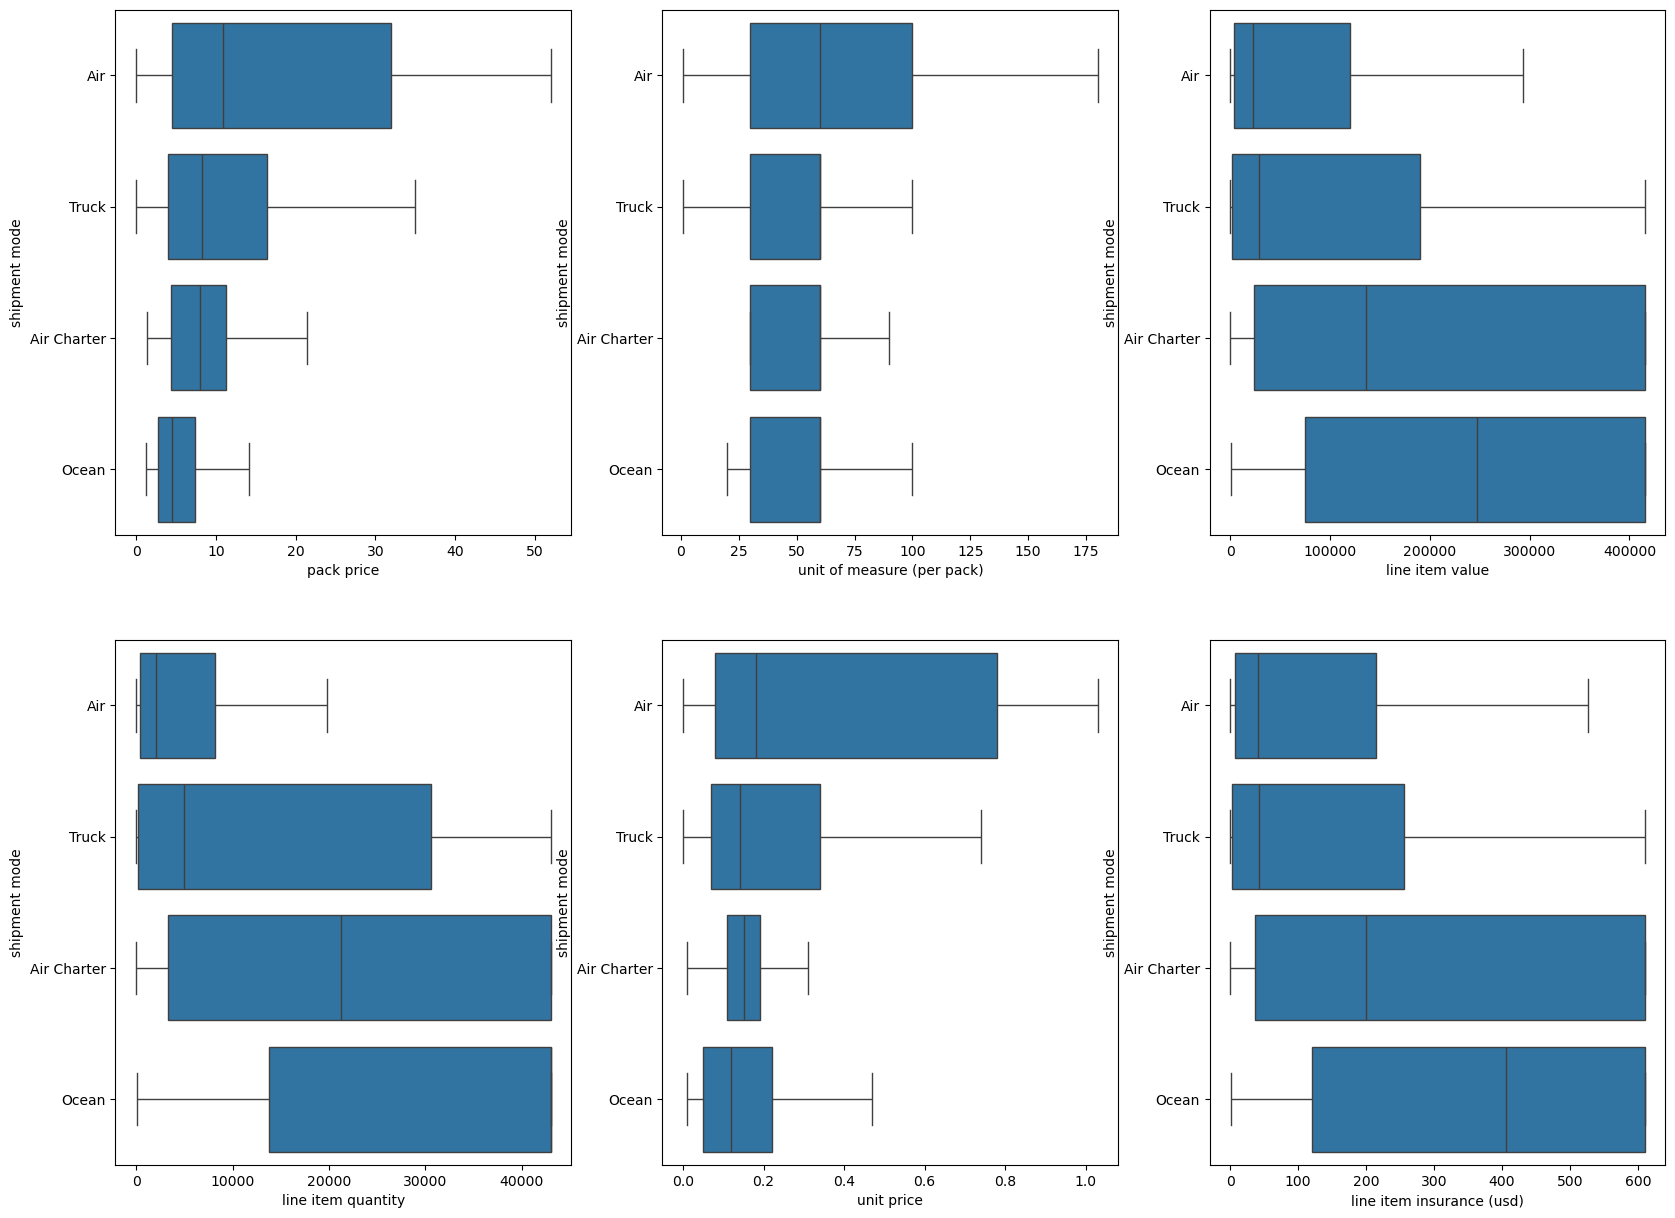

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
sns.boxplot(data=data, x="pack price", y="shipment mode",showfliers=False)

plt.subplot(2, 3, 2)
sns.boxplot(data=data, x="unit of measure (per pack)", y="shipment mode",showfliers=False)

plt.subplot(2,3,3)
sns.boxplot(data=data, x="line item value", y="shipment mode",showfliers=False)

plt.subplot(2,3,4)
sns.boxplot(data=data, x="line item quantity", y="shipment mode",showfliers=False)

plt.subplot(2,3,5)
sns.boxplot(data=data, x="unit price", y="shipment mode", showfliers=False)

plt.subplot(2,3,6)
sns.boxplot(data=data, x="line item insurance (usd)", y="shipment mode", showfliers=False)

The boxplots reveal that trucks have high variability in "line item quantity" and "unit of measure," while air freight handles lightweight, high-value goods, and ocean freight is used for bulk, cost-effective shipments (Chopra & Meindl, 2016).

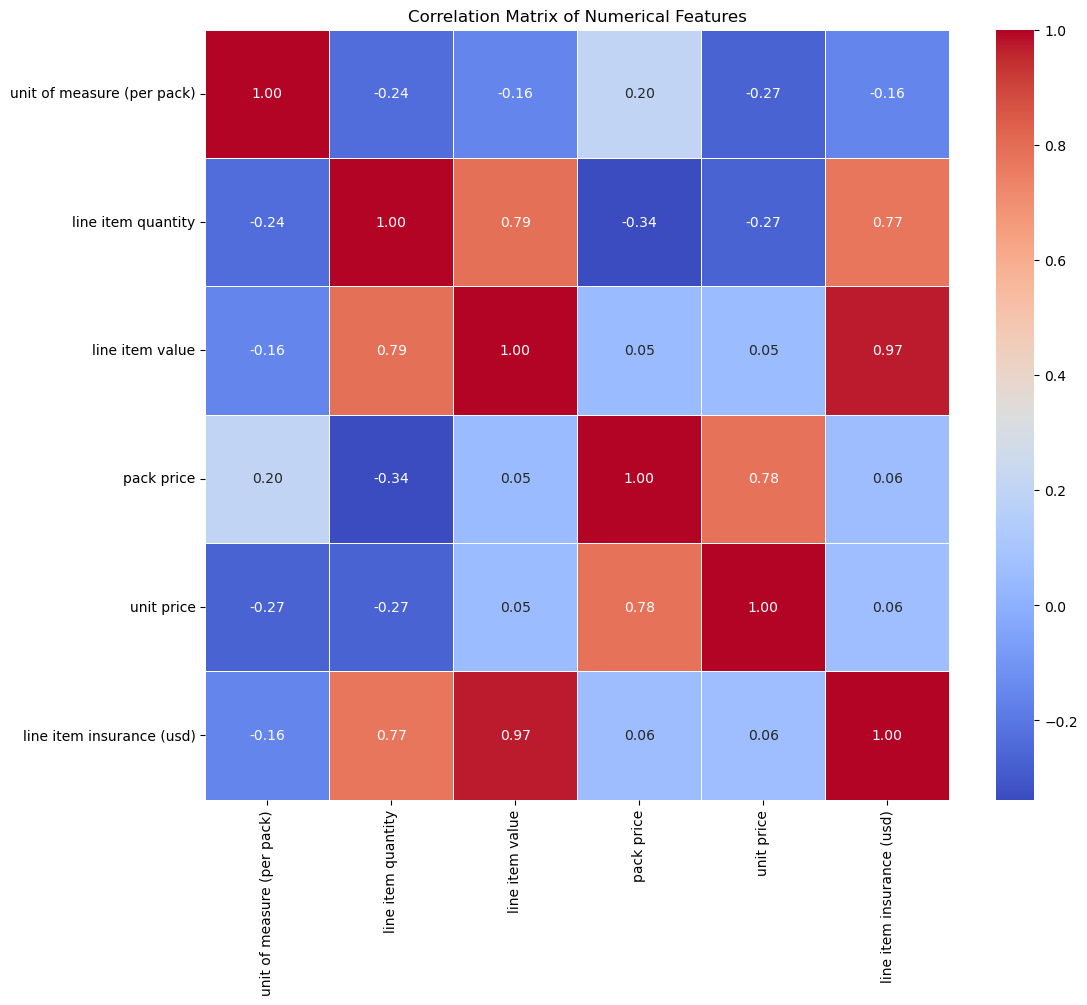

In [31]:
# Step 1: Select only numerical columns from your DataFrame
numerical_data = data.select_dtypes(include=['number'])  # This will select only numerical columns

# Step 2: Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Step 4: Title and display the plot
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The heatmap illustrates the correlations among numerical variables through Pearson's correlation coefficient. The weak correlations between pack price and unit pricing with other variables indicate their distinct significance in modeling.

### 4.3 Categorical Features: Univariate & Bivariate Analysis

/var/folders/kp/1bschsk12nz99rcdl44mrym80000gn/T/ipykernel_4506/894438339.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='shipment mode', data=data, ax=axes[0, 1], palette='Blues_d')


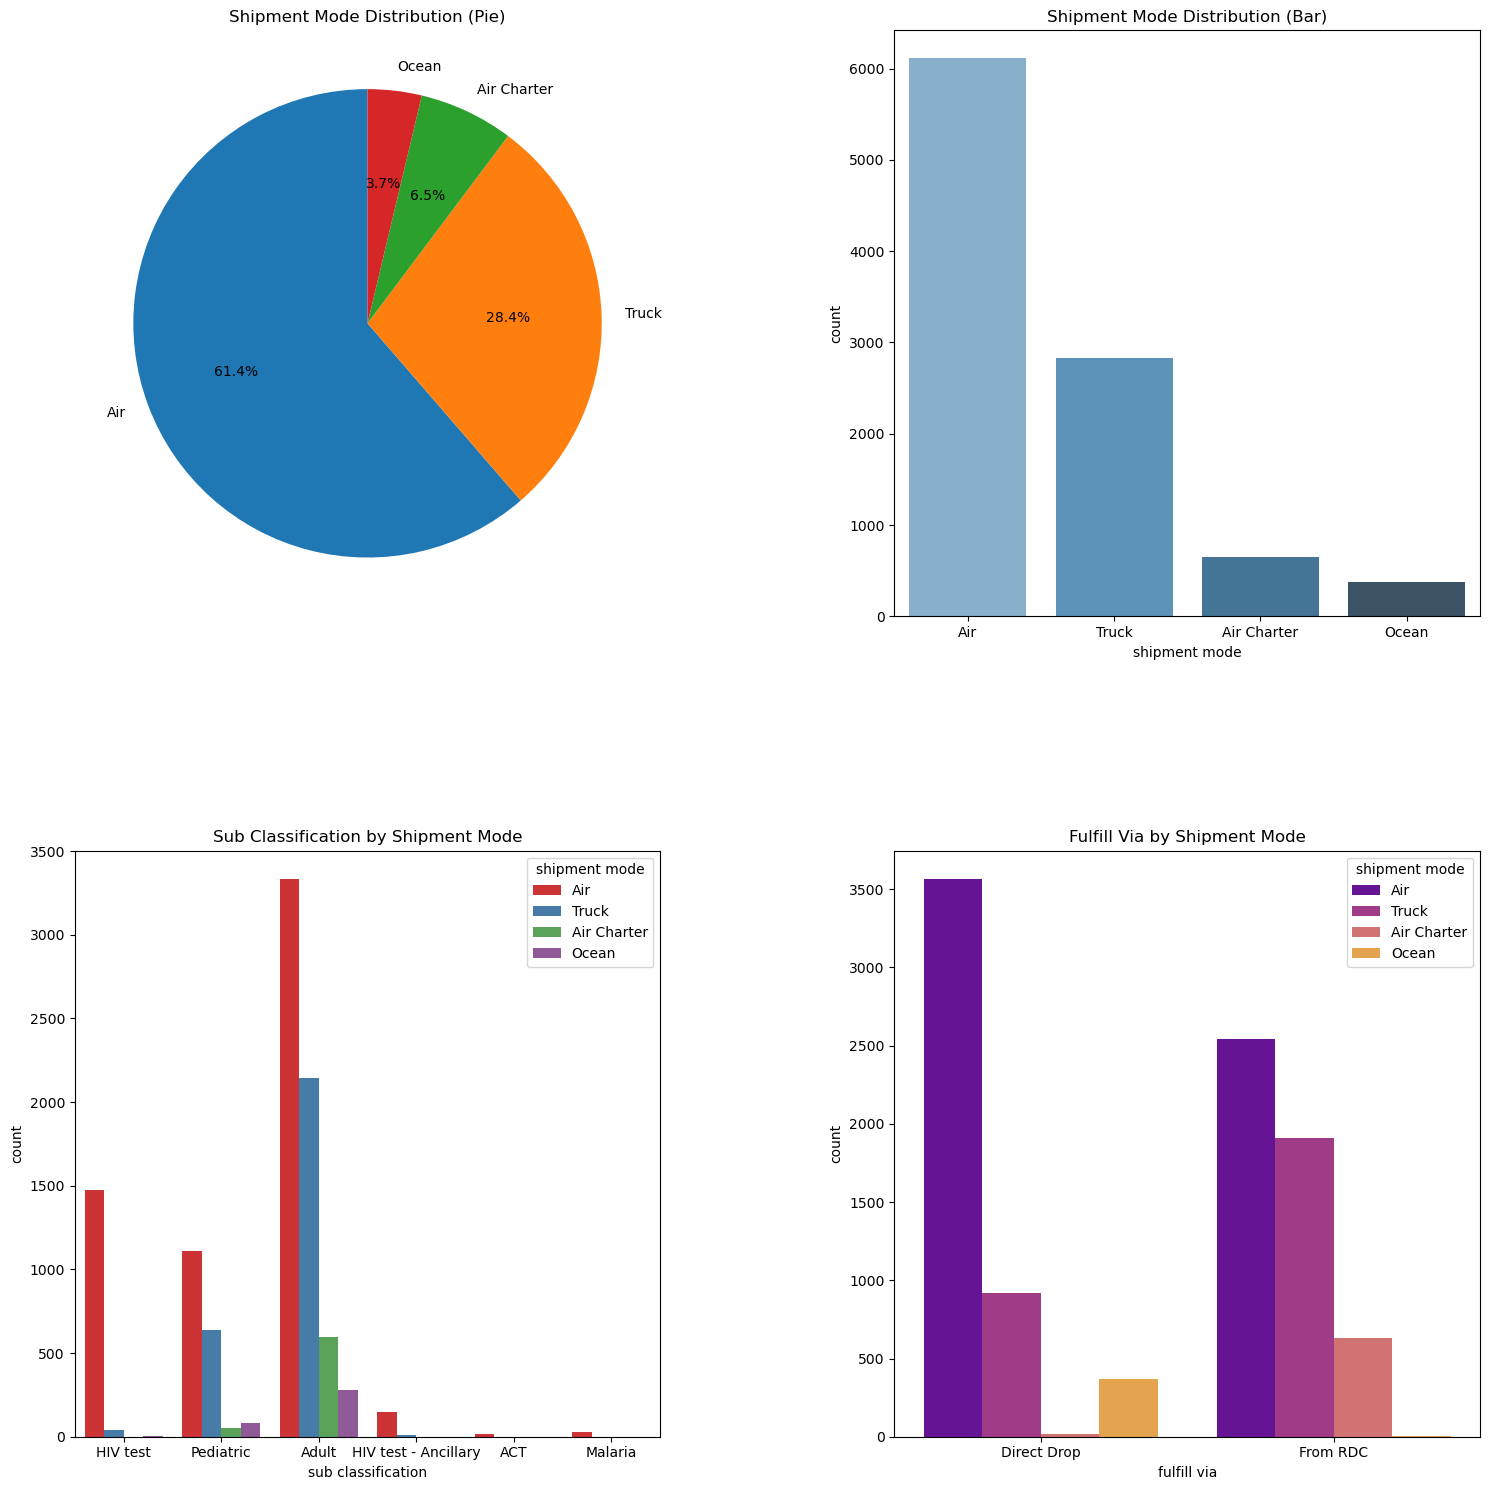

In [35]:
# Set up the first set of subplots (3 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# 1. Count of shipment mode by shipment mode (pie chart)
axes[0, 0].pie(data['shipment mode'].value_counts(), labels=data['shipment mode'].value_counts().index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title("Shipment Mode Distribution (Pie)")

# 2. Count of shipment mode by shipment mode (bar chart)
sns.countplot(x='shipment mode', data=data, ax=axes[0, 1], palette='Blues_d')
axes[0, 1].set_title("Shipment Mode Distribution (Bar)")

# 3. Count of sub classification by shipment mode and sub classifications
sns.countplot(x='sub classification', hue='shipment mode', data=data, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title("Sub Classification by Shipment Mode")

# 4. Countplot for 'Fulfill Via' by shipment mode
sns.countplot(x='fulfill via', hue='shipment mode', data=data, palette='plasma')
axes[1, 1].set_title("Fulfill Via by Shipment Mode")

# Adjust layout and add some space
plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


Pie and bar charts show Air (61.4%) and Truck (28.4%) dominate shipments, with Ocean and Air Charter serving specialized needs. Air is mainly used for urgent categories like Adult and Pediatric, while HIV products rely on Air and Air Charter. "Direct Drop" is linked to Air for time-sensitive deliveries, and "From RDC" supports bulk truck and ocean shipments.

<Figure size 1000x600 with 0 Axes>

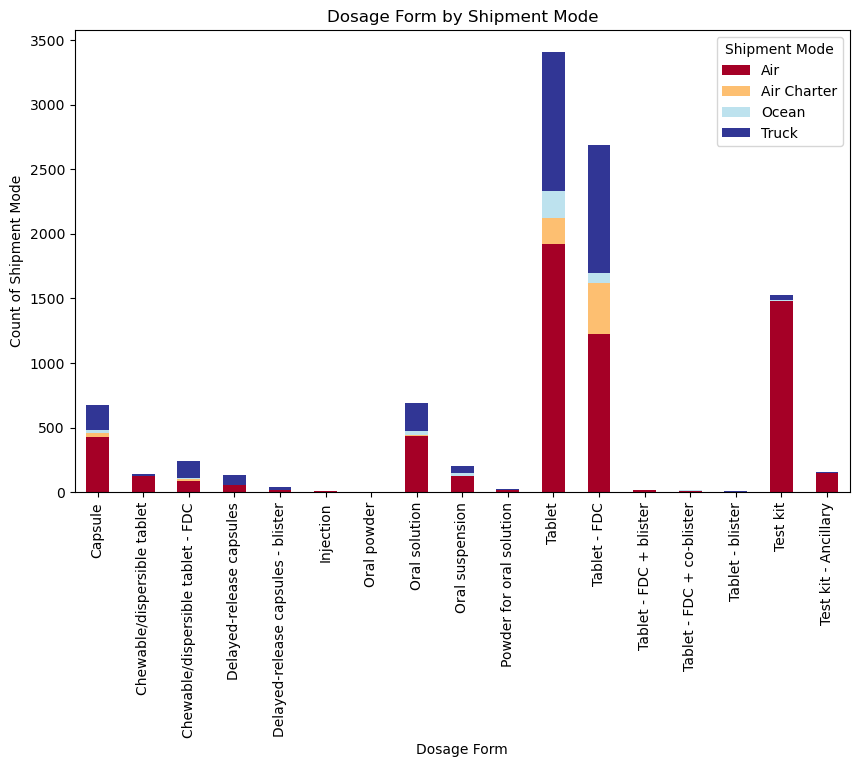

In [38]:
# Stacked bar chart for dosage form by shipment mode
plt.figure(figsize=(10, 6))
dosage_by_shipment_mode = pd.crosstab(data['dosage form'], data['shipment mode'])
dosage_by_shipment_mode.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='RdYlBu')
plt.title("Dosage Form by Shipment Mode")
plt.xlabel("Dosage Form")
plt.ylabel("Count of Shipment Mode")
plt.legend(title='Shipment Mode')
plt.show()

# Insight: This stacked bar chart shows how shipment modes are distributed across different dosage forms

Tablets and test kits are primarily shipped by air and truck, reflecting their critical role in healthcare logistics, while ocean transport focuses on less time-sensitive or bulkier dosage forms.

/var/folders/kp/1bschsk12nz99rcdl44mrym80000gn/T/ipykernel_4506/1289906846.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['year'] = pd.to_datetime(data['scheduled delivery date'], errors='coerce').dt.year


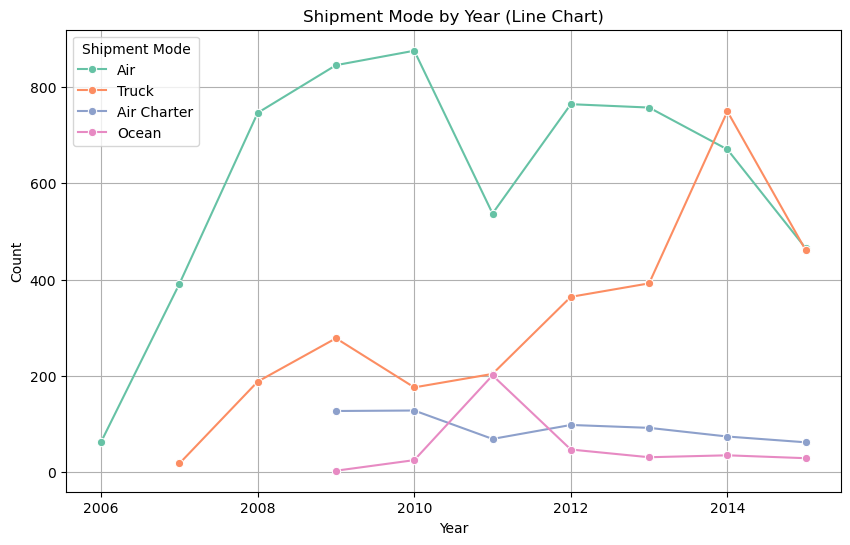

In [41]:
# Extract year from 'scheduled delivery date' if not already extracted
data['year'] = pd.to_datetime(data['scheduled delivery date'], errors='coerce').dt.year

# Grouping data by year and shipment mode, and counting the occurrences
shipment_mode_by_year = data.groupby(['year', 'shipment mode']).size().reset_index(name='count')

# Line chart for Shipment Mode by Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='count', hue='shipment mode', data=shipment_mode_by_year, marker='o', palette='Set2')

# Adding title and labels
plt.title("Shipment Mode by Year (Line Chart)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='Shipment Mode')
plt.grid(True)

# Show the plot
plt.show()

# Insight: This line chart shows how the count of each shipment mode has changed over the years.


Air shipments have had constant growth, reaching a peak in 2012, while truck shipments exhibit a similar trend. Ocean and Air Charter exhibit negligible temporal variations, signifying their consistent niche application.

## 5. Feature Engineering

Feature engineering is crucial for our dataset to improve model performance. It involves extracting key features (e.g., year, month, day from dates), encoding categorical variables, and scaling numerical data, enabling the model to learn effectively and make accurate predictions.

In [46]:
def feature_engineering(df, label_mapping):
    
    """
    Main function to call all sub-functions related to feature engineering.
    """
    
    df = extract_date_features(df)
    df = binary_encoding(df)
    df = one_hot_encoding(df)
    X_train, X_test, y_train, y_test = split_and_encode_labels(df, label_mapping)
    X_train, X_test = standard_scaling(X_train, X_test)
    
    return X_train, X_test, y_train, y_test

### 5.1 Extract Date Features

In [49]:
# 5.1 Extract Date Features

def extract_date_features(df):
    
    """
    Extracts year, month, and day from date columns.
    Drops the original date columns after extraction.
    """
    
    for column in ['scheduled delivery date', 'delivered to client date', 'delivery recorded date']:
        df[column] = pd.to_datetime(df[column])
        df[column + 'year'] = df[column].apply(lambda x: x.year)
        df[column + 'month'] = df[column].apply(lambda x: x.month)
        df[column + 'day'] = df[column].apply(lambda x: x.day)
        df = df.drop(column, axis=1)
        
    return df

Date columns often contain important temporal information, such as trends over time, seasonality, and specific events. By breaking down the date into its components (year, month, day), we enable the model to recognize these patterns. Dropping the original columns reduces redundancy and potential noise, as these extracted features are sufficient to represent the temporal data.

### 5.2 Binary Encoding

In [53]:
# 5.2 Binary Encoding
def binary_encoding(df):
    
    """
    Performs binary encoding on the 'fulfill via' and 'first line designation' columns.
    """
    
    df['fulfill via'] = df['fulfill via'].replace({'Direct Drop': 0, 'From RDC': 1})
    df['first line designation'] = df['first line designation'].replace({'No': 0, 'Yes': 1})
    
    return df

Machine learning models generally perform better with numerical data, as they are designed to process numbers rather than categorical values. For binary features, encoding them as 0s and 1s is a simple and efficient way to represent the categories. This binary encoding ensures that the model can interpret the values appropriately without introducing unnecessary complexity or dimensionality.

### 5.3 One-Hot Encoding

In [57]:
# 5.3 One Hot Encoding
def one_hot_encoding(df):
    
    """
    Performs one-hot encoding on categorical columns, excluding 'shipment mode'.
    """
    
    for column in df.select_dtypes('object').columns.drop('shipment mode'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
        
    return df

Categorical features must be numerically encoded for machine learning models. One-hot encoding ensures each category is treated as distinct, avoiding assumptions of order or hierarchy. For instance, ['Truck', 'Air', 'Ocean'] becomes separate columns where '1' indicates the presence of a category, preventing models from inferring ordinal relationships.

### 5.4 Splitting the Dataset & Encoding Labels

In [61]:
# 5.4 Splitting the Dataset & Encoding Labels
def split_and_encode_labels(df, label_mapping):
    
    """
    Splits the data into features (X) and target (y) and encodes the target labels.
    """
    
    y = df['shipment mode']
    X = df.drop('shipment mode', axis=1)

    # Encode the labels
    y = y.replace(label_mapping)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1111, shuffle=True)
    
    return X_train, X_test, y_train, y_test

The target variable must be encoded numerically so that the machine learning model can process it. We use label encoding for this, as it provides a straightforward way to convert categorical labels into numeric form. Splitting the dataset into training and testing sets is critical for evaluating model performance. It ensures that the model is trained on one portion of the data and evaluated on another, helping us assess its generalization ability on unseen data.

### 5.5 Standard Scaling

In [65]:
# 5.5 Standard Scaling
def standard_scaling(X_train, X_test):
    
    """
    Scales the features using StandardScaler.
    """
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train, X_test

Logistic regression relies on distance metrics or gradient-based optimization. These models assume that features are on a similar scale. If one feature, for example, has values in the range of thousands and another has values in the range of 0 to 1, the model will give more weight to the larger values, which could skew the results. Standard scaling ensures that all features contribute equally to the model, improving performance and convergence.

### 5.6 Label Mapping

In [69]:
# 5.6 Label Mapping
label_mapping = {'Air': 0, 
                 'Truck': 1, 
                 'Air Charter': 2, 
                 'Ocean': 3}  # From most populated to least populated


 Label encoding is an effective way to convert categorical labels into numerical representations, especially when the target variable is nominal. In our case, assigning a numeric value to each shipment mode helps the model interpret the target labels and optimize its parameters accordingly.

In [72]:
# Calling the final datasets after feature engineering
X_train, X_test, y_train, y_test = feature_engineering(data, label_mapping=label_mapping)

/var/folders/kp/1bschsk12nz99rcdl44mrym80000gn/T/ipykernel_4506/3982037647.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
/var/folders/kp/1bschsk12nz99rcdl44mrym80000gn/T/ipykernel_4506/3982037647.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
/var/folders/kp/1bschsk12nz99rcdl44mrym80000gn/T/ipykernel_4506/3982037647.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column])
/var/folders/kp/1bschsk12nz99rcdl44mrym80000gn/T/ipykernel_4506/3743383548.p

## 6. Model Training & Prediction

Four models were used to predict shipment mode, chosen for their suitability to handle categorical data and the large dataset size, while addressing potential linear and non-linear relationships.

### 6.1 Baseline Model: Multinomial Logistic Regresion

A Multinomial Logistic Regression was utilised (over normal logistic regression as shipment mode has more than two categories). It works like a logistic regression predicting the probability of each shipment mode based on input variables by applying a logistic function to a linear combination of these functions. 

In [78]:
# Baseline Model: Multinomial Logistic Regression
lr_model = LogisticRegression(random_state=1111, multi_class='multinomial', solver='saga', max_iter=5000)
lr_model.fit(X_train, y_train)

y_pred_log_reg = lr_model.predict(X_test)

# Classification Report
print(" Multinomial Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"\033[1;34mMultinomial Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%\033[0m")

 Multinomial Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1848
           1       0.86      0.88      0.87       835
           2       0.78      0.84      0.81       193
           3       0.74      0.72      0.73       114

    accuracy                           0.88      2990
   macro avg       0.82      0.83      0.83      2990
weighted avg       0.88      0.88      0.88      2990

Multinomial Logistic Regression Accuracy: 88.03%


### 6.2 Gradient Boosting Classifier

Gradient Boosting is a machine learning algorithm that builds a model by building trees one after another to create a strong predictive model by combining the old predictions with the new tree’s predictions. 

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=1111)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Classification Report
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\033[1;34mGradient Boosting Accuracy: {accuracy_gb * 100:.2f}%\033[0m")

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1848
           1       0.90      0.89      0.89       835
           2       0.91      0.92      0.91       193
           3       0.87      0.79      0.83       114

    accuracy                           0.92      2990
   macro avg       0.90      0.88      0.89      2990
weighted avg       0.92      0.92      0.92      2990

Gradient Boosting Accuracy: 91.71%


### 6.3 Neural Network (MLP) Classifier

Neural Network (MLP) Classifier is a type of artificial neural network designed to learn complex patterns in data and make predictions about shipment modes for out input data. We chose this model was chosen as it can handles non-linearity, and versatility so would work for our multi-class classification problem. 

In [86]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Train Neural Network (MLP)
nn_model = MLPClassifier(random_state=1111, max_iter=1000)
nn_model.fit(X_train, y_train)

# Predictions
y_pred_nn = nn_model.predict(X_test)

# Classification Report
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

# Accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"\033[1;34mNeural Network (MLP Classifier) Accuracy: {accuracy_nn * 100:.2f}%\033[0m")

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1848
           1       0.87      0.88      0.88       835
           2       0.85      0.86      0.86       193
           3       0.85      0.77      0.81       114

    accuracy                           0.90      2990
   macro avg       0.87      0.86      0.86      2990
weighted avg       0.90      0.90      0.90      2990

Neural Network (MLP Classifier) Accuracy: 89.90%


### 6.4 Random Forest Classifier

The Random Forest Classifier is a machine learning algorithm that builds multiple decision trees and aggregates the predictions using classification to return a shipment mode based on majority voting. 

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Advanced Model: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=1111)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Classification Report
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\033[1;34mRandom Forest Accuracy: {accuracy_rf * 100:.2f}%\033[0m")

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1848
           1       0.89      0.90      0.90       835
           2       0.92      0.90      0.91       193
           3       0.95      0.77      0.85       114

    accuracy                           0.92      2990
   macro avg       0.92      0.88      0.90      2990
weighted avg       0.92      0.92      0.92      2990

Random Forest Accuracy: 92.14%


Random Forest had the highest accuracy and F1 scores, making it the top performer. Gradient Boosting was comparable, especially with class imbalances. Logistic Regression offered interpretability but lower predictive power, while Neural Networks, though scalable, underperformed in accuracy and interpretability.

## 7. Performance Evaluation

### 7.1 Baseline Model: Multinomial Logistic Regression

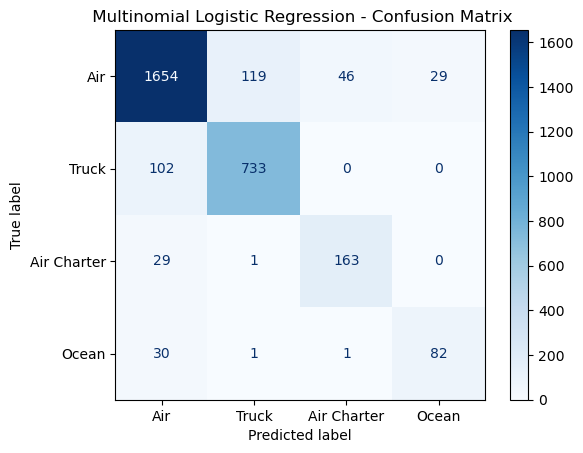

In [95]:
y_pred_log_reg = lr_model.predict(X_test)

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg, labels=list(label_mapping.values()))
# Print Classification Report for Logistic Regression
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=list(label_mapping.keys()))
disp_log_reg.plot(cmap='Blues')
plt.title(" Multinomial Logistic Regression - Confusion Matrix")
plt.show()

The Logistic Regression model achieves an accuracy of 88.13%, performing well for the dominant classes "Air" and "Truck". However, its performance drops for "Air Charter" and "Ocean" due to class imbalance. The confusion matrix highlights the correct and incorrect predictions for each class, revealing frequent misclassifications.

### 7.2 Gradient Boosting Classifier

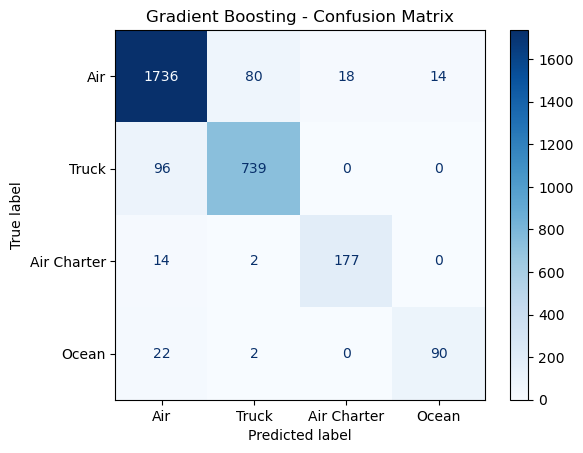

In [99]:
# Predictions
y_pred_gb = gb_model.predict(X_test)

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb, labels=list(label_mapping.values()))
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=list(label_mapping.keys()))
disp_gb.plot(cmap='Blues')
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

Gradient Boosting achieves 91.87% accuracy, outperforming logistic regression. It predicts the dominant "Air" class well, with the confusion matrix showing most predictions aligning correctly. Overall, the model demonstrates excellent performance.

### 7.3 Neural Network (MLP Classifier)

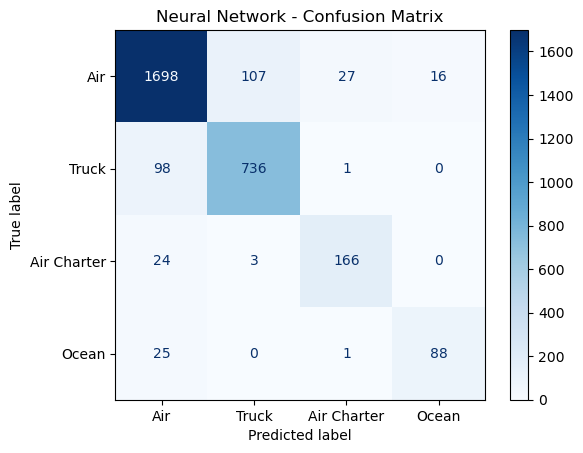

In [103]:
# Predictions
y_pred_nn = nn_model.predict(X_test)

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn, labels=list(label_mapping.values()))
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=list(label_mapping.keys()))
disp_nn.plot(cmap='Blues')
plt.title("Neural Network - Confusion Matrix")
plt.show()

The Neural Network achieves 89.87% accuracy, with the "Ocean" class showing an F1-score of 80%, indicating challenges in classifying rare categories. Overall, the model performs effectively.

### 7.4 Random Forest Classifier

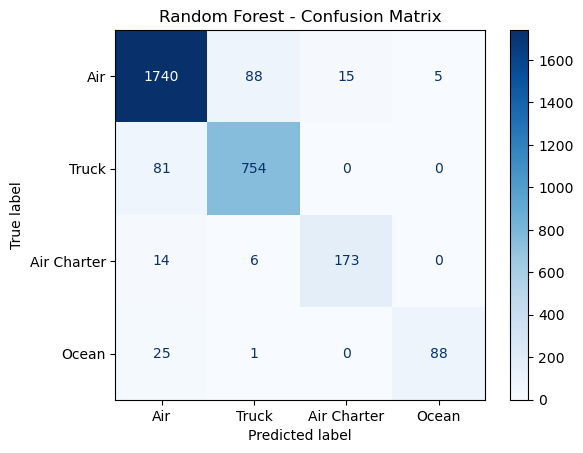

In [107]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=list(label_mapping.values()))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=list(label_mapping.keys()))
disp_rf.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()

The Random Forest classifier achieves the highest accuracy at 92.31%. It performs similarly to Gradient Boosting in F1-scores across categories but slightly outperforms it in precision.

According to initial analysis above, Random Forest Classifier is our best performing model.

### 7.5 Hyperparameter Tuning 

Hyperparameter tuning is crucial for optimizing models. For Random Forest, RandomizedSearchCV was used to efficiently sample hyperparameters and find the best configuration. This method is faster than grid search and enhances model generalization through cross-validation.

### Random Forest Regressor

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pa

Best hyperparameters found by RandomizedSearchCV: {'n_estimators': 350, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Test Set Accuracy: 92.68%


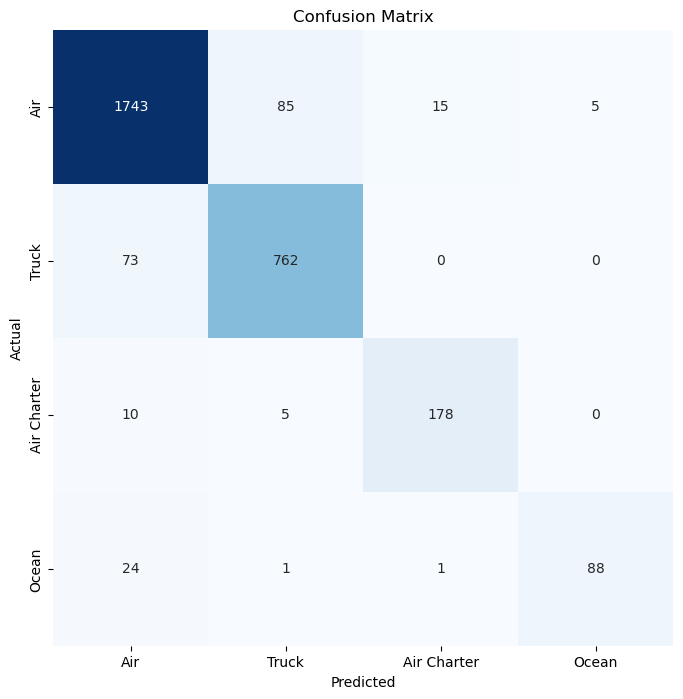

Classification Report:
----------------------
               precision    recall  f1-score   support

         Air       0.94      0.94      0.94      1848
       Truck       0.89      0.91      0.90       835
 Air Charter       0.92      0.92      0.92       193
       Ocean       0.95      0.77      0.85       114

    accuracy                           0.93      2990
   macro avg       0.92      0.89      0.90      2990
weighted avg       0.93      0.93      0.93      2990



In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 501, 50),           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],               # Maximum depth of the trees
    'min_samples_split': [2, 5, 10, 20],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6],                  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],          # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                         # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=1111)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_rf_params = random_search.best_params_
print("Best hyperparameters found by RandomizedSearchCV:", best_rf_params)

# Use the best model found by RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Train the model on the full training data
best_rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = best_rf_model.predict(X_test)

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf, labels=list(label_mapping.values()))

# Classification Report
clr = classification_report(y_test, y_pred_rf, labels=list(label_mapping.values()), target_names=list(label_mapping.keys()))

# Accuracy Score for Random Forest
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

# Visualizing the Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=list(label_mapping.keys()), 
            yticklabels=list(label_mapping.keys()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
print("Classification Report:\n----------------------\n", clr)


Despite tuning, performance improvements were marginal. Random Forest, being an ensemble method, is inherently robust, and further tuning offers diminishing returns once the model reaches optimal complexity. The model had already captured key patterns in the data, so increased complexity did not yield significant gains. Thus, while tuning helped, its impact was limited.

## 8. Data Visualisation

### 8.1 Comparing Models


Model Comparison Table:
                 Model  Accuracy  F1 Score (Macro)  F1 Score (Weighted)
0  Logistic Regression  0.880268          0.827219             0.880559
1        Random Forest  0.926756          0.903913             0.926555
2    Gradient Boosting  0.917057          0.890958             0.916796
3       Neural Network  0.898997          0.864564             0.898911


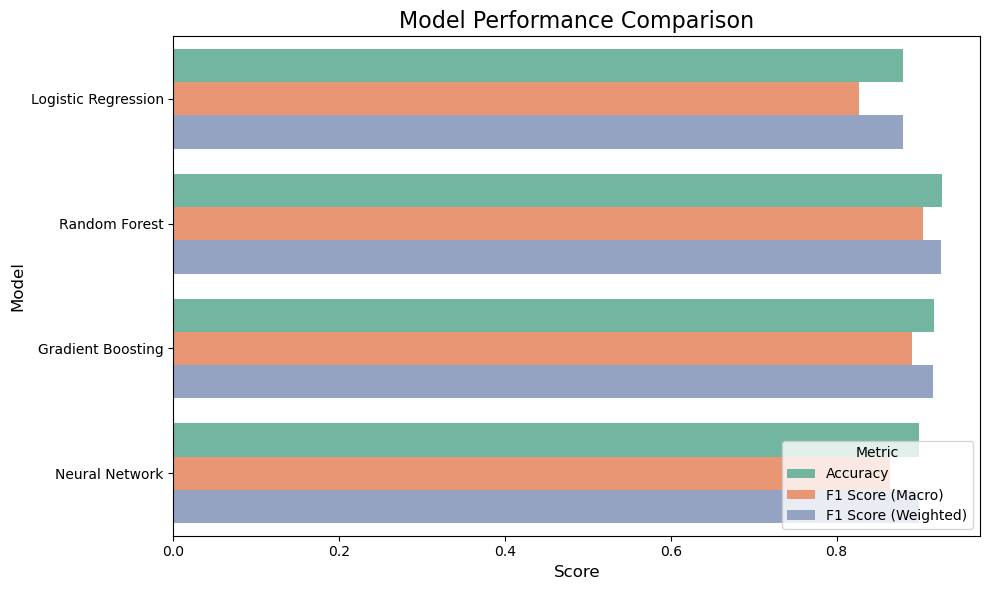

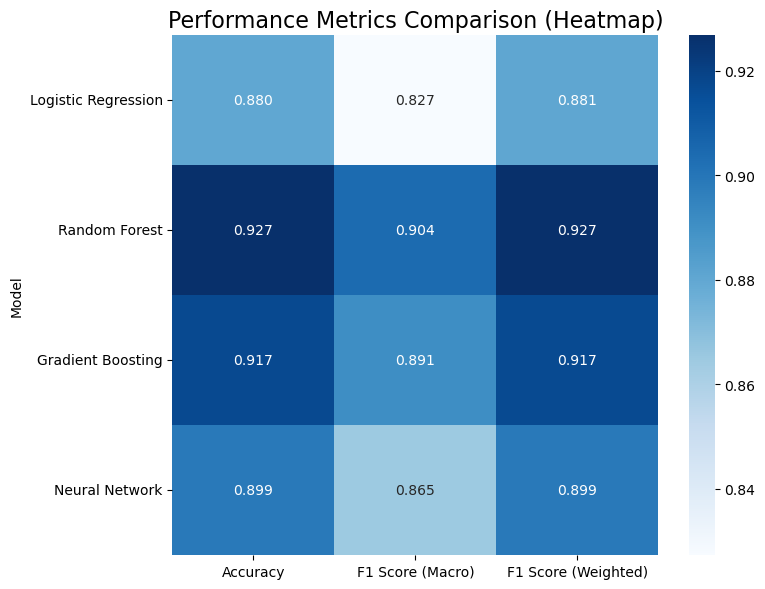

In [115]:
# Comparing Model's Performances

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, ConfusionMatrixDisplay


#Store all predictions for comparison
predictions = {
    "Logistic Regression": y_pred_log_reg,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Neural Network": y_pred_nn
}

# 3. Store evaluation results
results = {
    "Model": [],
    "Accuracy": [],
    "F1 Score (Macro)": [],
    "F1 Score (Weighted)": []
}

# 4. Evaluate the performance of each model
for model_name, y_pred in predictions.items():
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # F1 Scores
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["F1 Score (Macro)"].append(f1_macro)
    results["F1 Score (Weighted)"].append(f1_weighted)

# 5. Convert results into a DataFrame for easy visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Print the comparison table
print("\nModel Comparison Table:")
print(results_df)

# 6. Visualize comparison using a bar plot (Accuracy, F1 Score - Macro, and F1 Score - Weighted)
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the results DataFrame for easy plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
sns.barplot(x="Score", y="Model", hue="Metric", data=results_melted, palette="Set2")
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.legend(title="Metric", loc='lower right')
plt.tight_layout()
plt.show()

# 7. Optional: Visualize comparison using a heatmap (for performance metrics)
plt.figure(figsize=(8, 6))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap='Blues', fmt=".3f", cbar=True)
plt.title("Performance Metrics Comparison (Heatmap)", fontsize=16)
plt.tight_layout()
plt.show()

Random Forest outperforms all models, as indicated by the darkest shades, while Logistic Regression shows the weakest performance due to its simplicity.

### 8.2 Visualising One Decision Tree

Random Forest Model Accuracy: 0.9214
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1848
           1       0.89      0.90      0.90       835
           2       0.92      0.90      0.91       193
           3       0.95      0.77      0.85       114

    accuracy                           0.92      2990
   macro avg       0.92      0.88      0.90      2990
weighted avg       0.92      0.92      0.92      2990



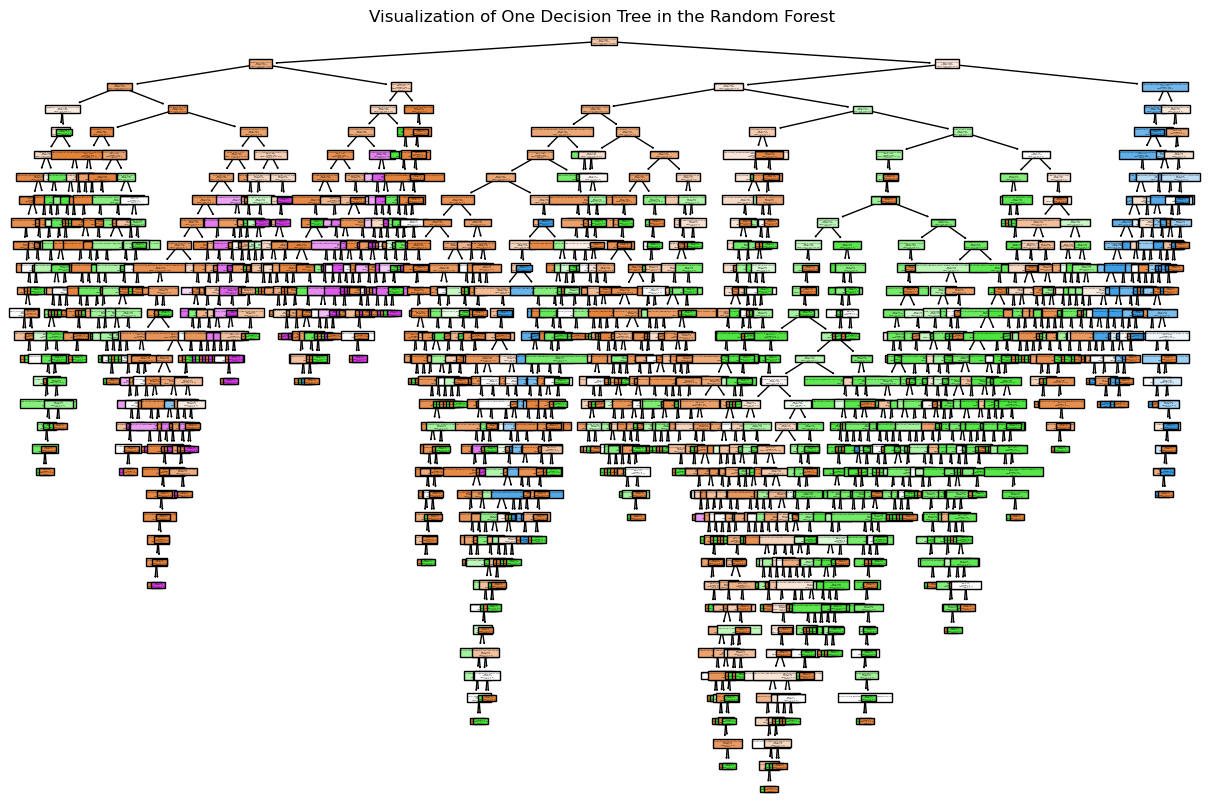

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Train Random Forest Model (Using your dataset)
rf_model = RandomForestClassifier(random_state=1111)
rf_model.fit(X_train, y_train)  # Assuming X_train and y_train are already defined

# Step 2: Make Predictions and Evaluate Model
y_pred_rf = rf_model.predict(X_test)  # Assuming X_test and y_test are already defined
print(f"Random Forest Model Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Step 3: Visualize One Decision Tree from the Random Forest
# Convert class labels to strings to avoid concatenation errors
class_names = [str(cls) for cls in y_train.unique()]

# Visualize an individual decision tree
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], filled=True, 
          feature_names=X_train.columns,  # Assuming X_train is a DataFrame
          class_names=class_names)  # Use the string-converted class names
plt.title("Visualization of One Decision Tree in the Random Forest")
plt.show()


This visualization illustrates a single decision tree from the Random Forest, highlighting how decisions are made through nodes and branches.

### 8.3 Top 10 Features

/var/folders/kp/1bschsk12nz99rcdl44mrym80000gn/T/ipykernel_4506/4118820446.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


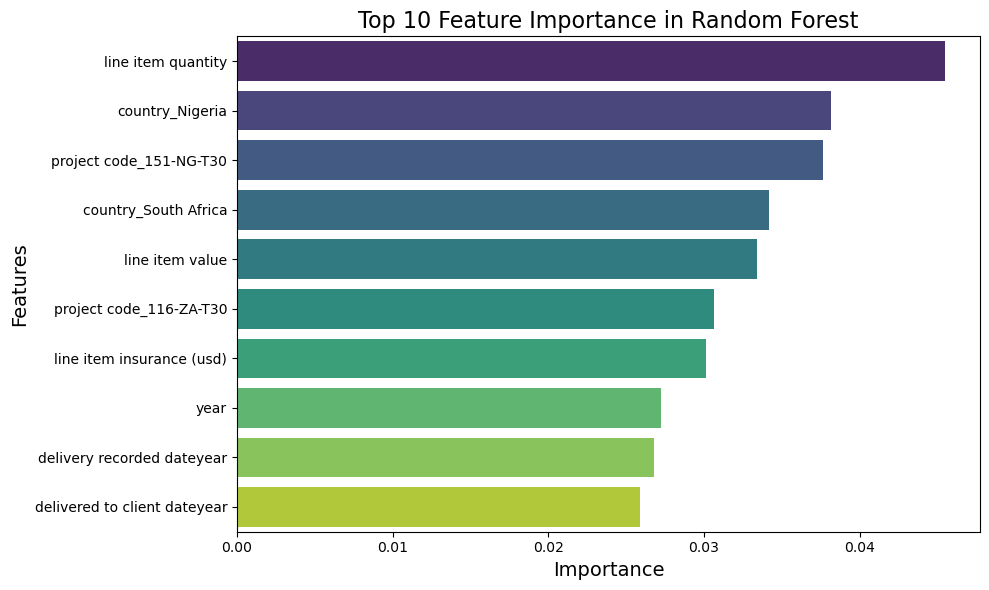

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Get feature names from X_train (assuming X_train is a DataFrame)
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features (e.g., top 10)
top_n = 10
top_features = feature_importance_df.head(top_n)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Title and labels
plt.title(f"Top {top_n} Feature Importance in Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Rotate y-axis labels for readability if they are long
plt.yticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


The figure ranks the top 10 factors influencing Random Forest predictions, with line-item quantity being the most important, followed by line-item value and insurance (USD).

Country-specific factors like country_Nigeria and country_South Africa, along with project codes and time-related features, highlight regional trends and seasonality's impact on shipment methods.es.


### Comparison with Gradient Boosting Model (Top 10 Features)

Both Random Forest and Gradient Boosting models highlight line-item quantity and year as key features, indicating their importance in determining shipment mode, with line-item quantity influencing mode choice due to varying capacities.

<Figure size 1000x600 with 0 Axes>

/var/folders/kp/1bschsk12nz99rcdl44mrym80000gn/T/ipykernel_4506/3888758262.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


Text(0.5, 1.0, 'Feature Importance in Gradient Boosting')

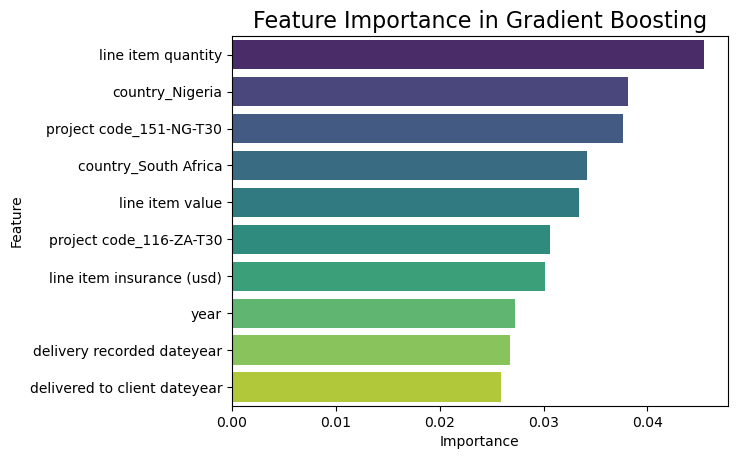

In [128]:
feature_importance = gb_model.feature_importances_

# Get feature names from X_train (assuming X_train is a DataFrame)
sorted_idx = np.argsort(feature_importance)[-10:]  # Last 10 indices (most important)
feature_names = X_train.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.show()
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title("Feature Importance in Gradient Boosting", fontsize=16)

### 8.4 Actual vs Predicted 

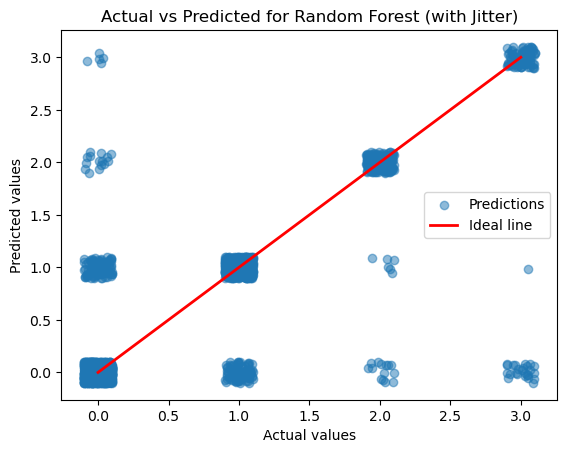

In [131]:
# Adding jitter to avoid overlapping points
jitter = 0.1  # Adjust the jitter amount as necessary
y_test_jittered = y_test + np.random.uniform(-jitter, jitter, size=len(y_test))
y_pred_jittered = y_pred_rf + np.random.uniform(-jitter, jitter, size=len(y_pred_rf))

# Scatter plot with jittered points
plt.scatter(y_test_jittered, y_pred_jittered, alpha=0.5, label="Predictions")

# Plot the red line (ideal line where predicted = actual)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label="Ideal line")

# Labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted for Random Forest (with Jitter)')
plt.legend()

# Show the plot
plt.show()

The scatter plot shows actual vs predicted values from Random Forest, with dense clusters near the red diagonal line confirming the model's high accuracy.

### 8.5 OOB Error

In [135]:
model = RandomForestRegressor(oob_score=True)
model.fit(X_train, y_train)

# Out-of-bag error
oob_error = 1 - model.oob_score_
print(f'OOB error: {oob_error}')

OOB error: 0.2115568868364156


The OOB error of 0.219 indicates that the Random Forest model has an average prediction error of 21.9% when validated on out-of-bag samples.

# 9. Limitations & Conclusions

This study leverages four machine learning models to predict shipment modes in the supply chain for Antiretroviral (ARV) and HIV lab shipments. The Random Forest Classifier outperformed others, showing high predictive accuracy and effectively handling complex dataset interactions. Key predictors included line-item quantity and line-item value. 

However, limitations exist. Missing data or imbalanced shipment mode classes may have affected performance. The inherent complexity of certain categorical features such as vendor inco terms and molecule/test type may not have been captured by all models. Additionally, reliance on static historical data assumed stable patterns, ignoring dynamic supply chain trends like vendor performance or evolving practices.
Future work could explore integrating additional data sources or updating models through feedback loops to adapt to changing supply chain scenarios.


# 10. Citations & References

- Christopher, M. (2022). *Logistics and Supply Chain Management*. Pearson UK. United States Agency for International Development (USAID). (2024). [Supply Chain Shipment Pricing Data](https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Dataset/a3rc-nmf6/about_data).
  
- Chandola, V., Banerjee, A. and Kumar, V. (2009). Anomaly Detection: A Survey. ACM Computing Surveys, 41(3), pp.1–58. doi: https://doi.org/10.1145/1541880.1541882.
  
- Chopra, S. and Meindl, P. (2016). Supply Chain Management : Strategy, Planning and Operation. 6th ed. New York, NY: Pearson Education..
- Random Forest: A Complete Guide for Machine Learning: [Random Forest Model](https://builtin.com/data-science/random-forest-algorithm#:~:text=Random%20forest%20adds%20additional%20randomness,results%20in%20a%20better%20model)
  
- [Random Forest Classification with Scikit-Learn](https://www.datacamp.com/tutorial/random-forests-classifier-python)


### 11.3 Additional Workings

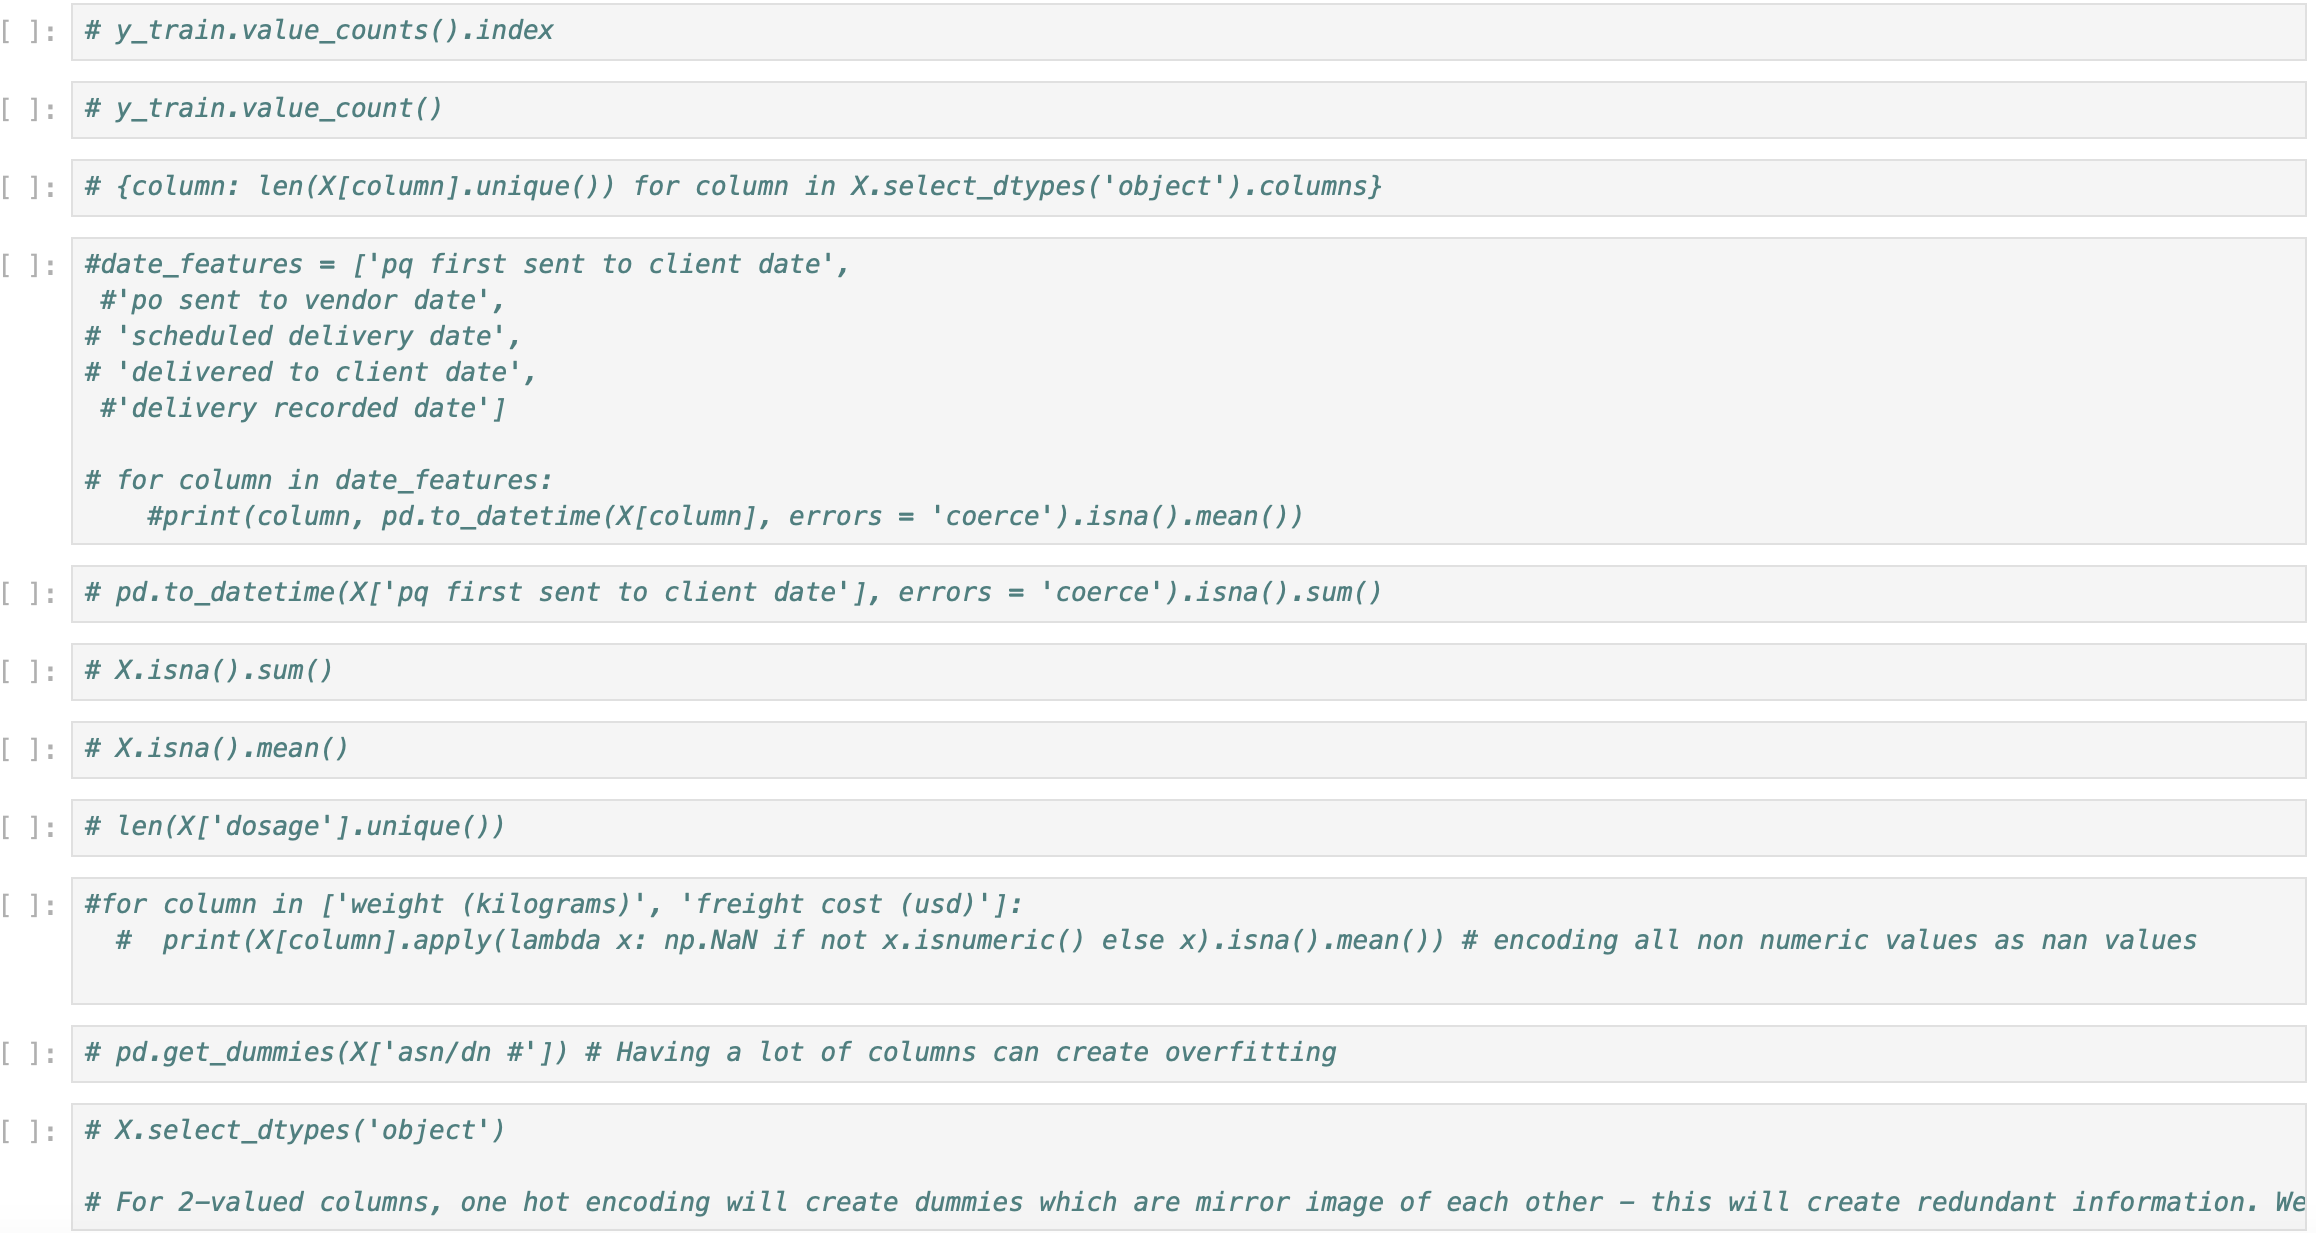

In [153]:
Image("Additional Workings.png")